<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.info()

data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


## Изучение данных из файла

### Вывод

Видны NaN в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Буду разбирать по порядку. Так же очень разные данные, и нужно менять их тип. 

In [2]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

## Предобработка данных

Начнем с удаления дубликатов, а потом и остального

In [5]:
data = data.drop_duplicates().reset_index(drop=True)

Дальше самое очевидное это с is_apartment, и balcony

In [6]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Считаю нужным заменить все пропущеные значения на False. Судя по описанию из векипедии в России апартаменты - это нежилые помещения, поэтому заменяем на False

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Что касается балконов, то так же заменяем пропуски на нулевые значения.

In [8]:
data['balcony'] = data['balcony'].fillna(value=0).astype('float').astype('int')
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

In [9]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Меня смущает большое количество пропусков в parks_nearest и ponds_nearest. Хочу проверить если ли зависимость между parks_around3000 и parks_nearest, и так же между ponds_nearest и ponds_around3000

In [11]:
data[data['parks_nearest'].isnull()]['parks_around3000'].value_counts()

0.0    10102
Name: parks_around3000, dtype: int64

Да, видно прямую зависимость, что в пропущенных значениях parks_nearest было отстутсвие парков в районе 3000 метров, значит нужно значения оставить пустыми, либо определить их в отдельные группы. Пока оставлю пустыми, и к тому же судя по вопросам, на которые необходимо ответить эти столбцы не нужны.

Что касается столбцов ceiling_height, floors_total, living_area, kitchen_area, days_exposition, cityCenters_nearest то хочу их заполнить медианными значениями по населенным пунктам

In [12]:
data.query('floors_total < floor')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [13]:
data.query('total_area < (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,6.20,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,False,...,5.00,0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,9.28,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,False,...,7.00,2,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,False,...,23.43,2,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,False,...,8.00,2,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,NaN,16.0,62.00,12,False,...,32.40,0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,NaN,5.0,44.00,5,False,...,8.00,1,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


In [14]:
#высота потолков
data['ceiling_height'] = data['ceiling_height'].fillna(
    data.groupby('locality_name')['ceiling_height'].transform('median'))

#жилая площадь
data['living_area'] = data['living_area'].fillna(
    data.groupby('rooms')['living_area'].transform('median'))

#площадь кухни
data['kitchen_area'] = data['kitchen_area'].fillna(
    data.groupby('rooms')['kitchen_area'].transform('median'))



In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
data[data['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.00,5,False,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,17.60,2,False,...,9.04,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.50,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.00,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,8.80,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Остались пропущенные значения, но пока не особо понимаю можно было бы их заполнить по другому, поэтому оставлю так. Что касается расстояний, то оставлю так же без изменений, потому что кажется, что когда заполняли данные, такое ощущение что их не заполняли, если это не Санкт-Петербург.

Теперь что касается типов данных

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23543 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23502 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000  

Я бы перевел floors_total в int и в целом всё остальное хорошо выглядит

In [18]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [20]:
data = data.dropna(axis='index', how='any', subset=['floors_total'])

data['floors_total'] = data['floors_total'].astype('int')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23459 non-null float64
floors_total            23613 non-null int64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23419 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000    

In [22]:
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')

## Расчёты и добавление результатов в таблицу

Сначала добавим цену за квадратный метр.

In [23]:
data['cost_area'] = data['last_price'] / data['total_area']

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23613 non-null int64
last_price              23613 non-null int64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23459 non-null float64
floors_total            23613 non-null int64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23419 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around3000      

Преабразуем строку first_day_exposition в дату и добавим новые столбцы

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['exposition_day'] = data['first_day_exposition'].dt.day

data['exposition_month'] = data['first_day_exposition'].dt.month

data['exposition_year'] = data['first_day_exposition'].dt.year

data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,7,3,2019
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,4,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,20,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14,45.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,24,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,19,6,2018


Распределим по группам этаж квартиры.

In [26]:
def apartment_floor(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    return 'другой'
 
data['apartment_floor'] = data.apply(apartment_floor, axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 27 columns):
total_images            23613 non-null int64
last_price              23613 non-null int64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          23459 non-null float64
floors_total            23613 non-null int64
living_area             23613 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            23419 non-null float64
balcony                 23613 non-null int64
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        18105 non-null float64
parks_nearest           8045 non-null float64
ponds_around30

In [27]:
data['apartment_floor'].value_counts()

другой       17363
последний     3336
первый        2914
Name: apartment_floor, dtype: int64

Добавим соотнощения площадей

In [28]:
data['living_to_all'] = data['living_area'] / data['total_area']
data['kitchen_to_all'] = data['kitchen_area'] / data['total_area']

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,7,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,4,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,20,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.70,14,45.0,9,False,...,3.0,234.0,424.0,408176.100629,24,7,2015,другой,0.283019,0.059748
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,19,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

Построим гистограммы

In [29]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,living_to_all,kitchen_to_all
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23459.000000,23613.000000,23613.000000,23613.000000,23419.000000,23613.000000,...,8045.000000,18105.000000,9061.000000,20441.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,23419.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.734208,10.673824,34.332019,5.877313,10.461337,0.593063,...,490.554630,0.770119,518.209469,180.884839,9.939748e+04,15.489857,6.400076,2017.368102,0.564024,0.188180
std,5.681541,1.090172e+07,35.648988,1.078380,1.014529,6.597173,21.712677,4.873539,5.667640,0.960307,...,341.336698,0.939075,277.887489,219.685543,5.035802e+04,8.636657,3.493160,1.039383,0.110865,0.074130
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,1.000000,1.000000,2014.000000,0.021583,0.018296
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.400000,2.000000,7.300000,0.000000,...,288.000000,0.000000,294.000000,45.000000,7.656250e+04,8.000000,3.000000,2017.000000,0.490762,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.300000,4.000000,9.040000,0.000000,...,455.000000,1.000000,503.000000,95.000000,9.500000e+04,15.000000,6.000000,2017.000000,0.566667,0.172840
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,...,612.000000,1.000000,730.000000,232.000000,1.142061e+05,23.000000,10.000000,2018.000000,0.638298,0.232877
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,31.000000,12.000000,2019.000000,1.514286,0.787879


Судя по первичной сводке видно выбросы в высоте потолков в размере 100м. По остальным пока не ясно

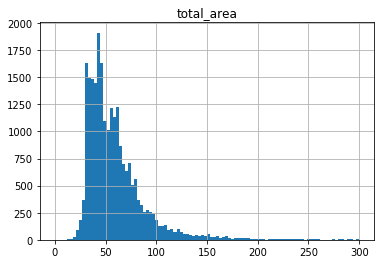

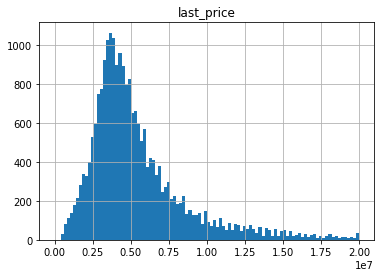

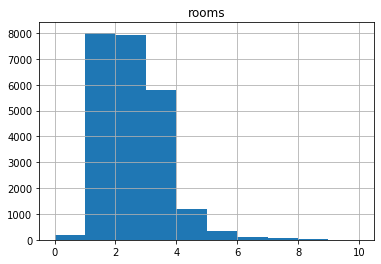

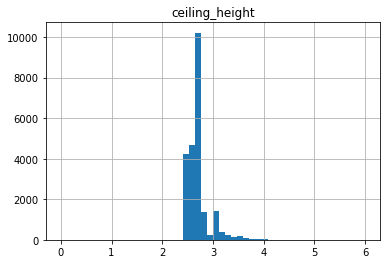

In [30]:
col = ['total_area', 'last_price', 'rooms', 'ceiling_height']
bins = [100, 100, 10, 50]
hist_range = [(0, 300), (0, 2*10e+6), (0, 10), (0, 6)]

for i in range(len(col)):
    data.hist(column=col[i], bins=bins[i], range=hist_range[i])

Построим гистрограмму по времени продажи квартиры

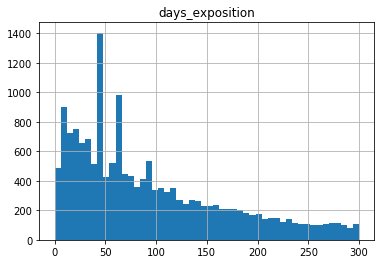

In [31]:
data.hist(column='days_exposition', bins=50, range=(0, 300));

In [32]:
data['days_exposition'].mean()


180.88483929357665

In [33]:
data['days_exposition'].median()

95.0

Среднее значение и медианное сильно различаются друг от друга, так как есть максимальные значения в днях размещения 1580 дней, и минимальные в 1 день, но в среднем для продажи квартиры необходимо 170 дней

Мне показалось что скорость продажи зависит от года, поэтому я посмотрел по годам, когда время продажи было больше медианного в разные года

In [34]:
data[data['days_exposition'] > data['days_exposition'].median()]['exposition_year'].value_counts()

2017    4107
2018    2712
2016    2142
2015    1114
2014     119
2019      17
Name: exposition_year, dtype: int64

In [35]:
data[data['days_exposition'] < data['days_exposition'].median()]['exposition_year'].value_counts()

2018    4792
2017    3764
2019    1063
2016     548
Name: exposition_year, dtype: int64

Дольше всего квартиры брали в 2017 году, но в 2018 спрос на квартиры начал увеличиваться, судя по цифрам.

Что касается редких значений. Я бы построил диаграмму размаха для days_exposition,  и для ceiling_height

In [36]:
import matplotlib.pyplot as plt

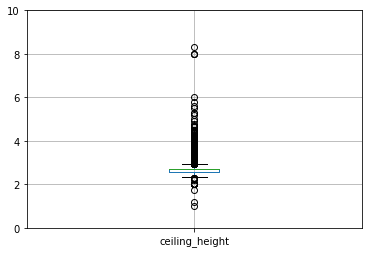

In [37]:
plt.ylim(0, 10)

data.boxplot(column=['ceiling_height'])

Судя по диаграме я бы удалил все значения, где потолки больше 6 метров, хотя может они сдают ангар?

In [38]:
data.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all
313,1,2450000,49.0,2016-03-09,3,13.85,5,34.0,2,False,...,NaN,NaN,189.0,50000.000000,9,3,2016,другой,0.693878,0.112245
355,17,3600000,55.2,2018-07-12,2,25.00,5,32.0,2,False,...,NaN,NaN,259.0,65217.391304,12,7,2018,другой,0.579710,0.159420
2158,15,1500000,42.0,2017-12-23,2,27.00,2,29.0,2,False,...,NaN,NaN,NaN,35714.285714,23,12,2017,последний,0.690476,0.130952
3148,14,2900000,75.0,2018-11-12,3,32.00,3,53.0,2,False,...,NaN,NaN,NaN,38666.666667,12,11,2018,другой,0.706667,0.106667
3474,3,1400000,30.0,2018-03-16,1,8.00,5,15.3,2,False,...,NaN,NaN,125.0,46666.666667,16,3,2018,другой,0.510000,0.243333
4643,0,4300000,45.0,2018-02-01,2,25.00,9,30.0,2,False,...,1.0,331.0,181.0,95555.555556,1,2,2018,другой,0.666667,0.155556
4876,7,3000000,25.0,2017-09-27,0,27.00,25,17.0,17,False,...,NaN,NaN,28.0,120000.000000,27,9,2017,другой,0.680000,NaN
5076,0,3850000,30.5,2018-10-03,1,24.00,5,19.5,1,True,...,1.0,578.0,7.0,126229.508197,3,10,2018,первый,0.639344,0.180328
5246,0,2500000,54.0,2017-10-13,2,27.00,5,30.0,3,False,...,NaN,NaN,540.0,46296.296296,13,10,2017,другой,0.555556,0.166667
5669,4,4400000,50.0,2017-08-08,2,26.00,9,21.3,3,False,...,0.0,NaN,267.0,88000.000000,8,8,2017,другой,0.426000,0.140000


In [39]:
data.query('ceiling_height <= 1.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all
5712,5,1500000,42.8,2017-08-14,2,1.2,2,27.5,1,False,...,NaN,NaN,248.0,35046.728972,14,8,2017,первый,0.642523,0.121495
22590,16,6000000,55.0,2018-10-31,2,1.0,12,32.4,7,False,...,2.0,289.0,13.0,109090.909091,31,10,2018,другой,0.589091,0.181818


Вызывают сомнения и данные, где потолки меньше 1.5 метра. Тогда бы я оставил все колонки, где потолки 1.5 <= ceiling_height < 6

In [40]:
data = data.query('1.5 <= ceiling_height < 6')

Что касается количества дней объявления до продажи

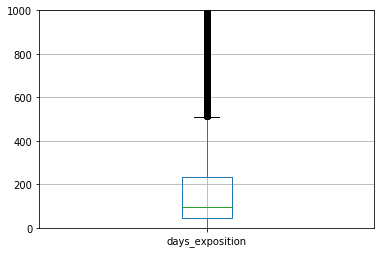

In [41]:
plt.ylim(0, 1000)

data.boxplot(column=['days_exposition'])

In [42]:
cost_med = data['cost_area'].median()
cost_med

95161.29032258065

In [43]:
data.query('days_exposition > 420')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,20,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.70,14,45.0,9,False,...,3.0,234.0,424.0,408176.100629,24,7,2015,другой,0.283019,0.059748
17,6,4180000,36.00,2016-09-09,1,2.70,17,16.5,7,False,...,1.0,859.0,571.0,116111.111111,9,9,2016,другой,0.458333,0.305556
23,11,2950000,32.00,2016-10-29,1,2.60,9,17.7,9,False,...,1.0,190.0,615.0,92187.500000,29,10,2016,последний,0.553125,0.190625
35,6,15500000,149.00,2017-06-26,5,2.70,5,104.0,4,False,...,1.0,779.0,644.0,104026.845638,26,6,2017,другой,0.697987,0.114094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23664,5,9000000,110.00,2015-12-10,4,3.36,7,64.6,5,False,...,1.0,118.0,816.0,81818.181818,10,12,2015,другой,0.587273,0.143636
23672,5,3000000,30.80,2016-06-08,1,2.70,5,16.1,3,False,...,0.0,NaN,808.0,97402.597403,8,6,2016,другой,0.522727,0.204545
23675,8,3550000,39.50,2016-10-03,1,2.70,16,19.0,13,False,...,0.0,NaN,721.0,89873.417722,3,10,2016,другой,0.481013,0.215190
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,1.0,806.0,519.0,129903.978052,13,10,2016,другой,0.552812,0.145405


In [44]:
data.query('days_exposition > 420 & cost_area > @cost_med')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all
3,0,64900000,159.00,2015-07-24,3,2.70,14,45.0,9,False,...,3.0,234.0,424.0,408176.100629,24,7,2015,другой,0.283019,0.059748
17,6,4180000,36.00,2016-09-09,1,2.70,17,16.5,7,False,...,1.0,859.0,571.0,116111.111111,9,9,2016,другой,0.458333,0.305556
35,6,15500000,149.00,2017-06-26,5,2.70,5,104.0,4,False,...,1.0,779.0,644.0,104026.845638,26,6,2017,другой,0.697987,0.114094
40,9,3590000,36.00,2017-03-15,1,2.60,26,15.0,22,False,...,0.0,NaN,430.0,99722.222222,15,3,2017,другой,0.416667,0.277778
42,13,22000000,161.80,2015-07-08,4,2.80,4,80.9,2,False,...,1.0,907.0,987.0,135970.333745,8,7,2015,другой,0.500000,0.108776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23627,11,6300000,42.30,2017-01-27,1,2.70,10,16.3,4,False,...,0.0,NaN,616.0,148936.170213,27,1,2017,другой,0.385343,0.283688
23648,14,10100000,78.00,2017-05-12,3,3.27,5,48.6,5,False,...,2.0,117.0,621.0,129487.179487,12,5,2017,последний,0.623077,0.105128
23672,5,3000000,30.80,2016-06-08,1,2.70,5,16.1,3,False,...,0.0,NaN,808.0,97402.597403,8,6,2016,другой,0.522727,0.204545
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,1.0,806.0,519.0,129903.978052,13,10,2016,другой,0.552812,0.145405


Около половины значений, которые были больше 420 дней в объявляениях, были выше медианного значения за квадратный метр. Рискну предположить что тут есть зависимость. Правда изменять я бы никак не стал, потому что не вижу смысла

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23423 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23423 non-null int64
last_price              23423 non-null int64
total_area              23423 non-null float64
first_day_exposition    23423 non-null datetime64[ns]
rooms                   23423 non-null int64
ceiling_height          23423 non-null float64
floors_total            23423 non-null int64
living_area             23423 non-null float64
floor                   23423 non-null int64
is_apartment            23423 non-null bool
studio                  23423 non-null bool
open_plan               23423 non-null bool
kitchen_area            23232 non-null float64
balcony                 23423 non-null int64
locality_name           23409 non-null object
airports_nearest        18027 non-null float64
cityCenters_nearest     18050 non-null float64
parks_around3000        18051 non-null float64
parks_nearest           8026 non-null float64
ponds_around30

In [46]:
data['total_area'].describe()

count    23423.000000
mean        60.400298
std         35.732532
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

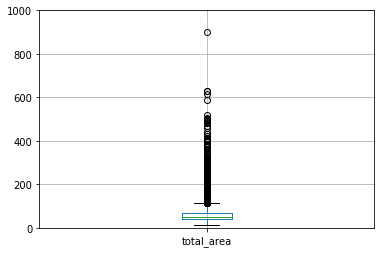

In [47]:
plt.ylim(0, 1000)

data.boxplot(column=['total_area'])

In [48]:
data.query('total_area > 400')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all
660,3,49950000,483.90,2017-10-04,7,3.20,6,312.500,4,False,...,3.0,22.0,391.0,1.032238e+05,4,10,2017,другой,0.645795,0.054557
3117,19,140000000,631.00,2019-03-30,7,2.70,5,145.000,5,False,...,2.0,210.0,NaN,2.218700e+05,30,3,2019,последний,0.229794,0.095087
3676,12,28789000,441.98,2019-01-23,4,2.70,6,63.600,6,False,...,0.0,NaN,NaN,6.513643e+04,23,1,2019,последний,0.143898,0.079302
4237,1,50000000,517.00,2017-10-14,7,2.70,4,332.000,3,False,...,2.0,540.0,NaN,9.671180e+04,14,10,2017,другой,0.642166,0.042553
5358,20,65000000,590.00,2019-02-14,15,3.50,6,409.000,3,False,...,0.0,NaN,14.0,1.101695e+05,14,2,2019,другой,0.693220,0.169492
5893,3,230000000,500.00,2017-05-31,6,2.70,7,123.900,7,False,...,2.0,198.0,50.0,4.600000e+05,31,5,2017,последний,0.247800,0.080000
6221,8,34000000,470.30,2018-01-14,4,2.70,3,248.700,3,False,...,3.0,122.0,179.0,7.229428e+04,14,1,2018,последний,0.528811,0.085052
6621,20,99000000,488.00,2017-04-09,5,2.95,20,216.000,17,False,...,1.0,368.0,351.0,2.028689e+05,9,4,2017,другой,0.442623,0.102459
8018,20,84000000,507.00,2015-12-17,5,4.45,7,301.500,7,True,...,0.0,NaN,1078.0,1.656805e+05,17,12,2015,последний,0.594675,0.089744
9826,1,43185328,494.10,2017-05-12,1,2.85,12,17.600,3,False,...,0.0,NaN,5.0,8.740200e+04,12,5,2017,другой,0.035620,0.018296


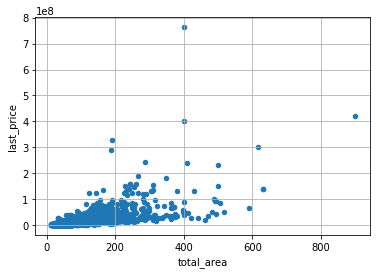

In [49]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True);

Видны редкие выбивающиеся значения в цене за квадратный метр я бы отбросил все, что больше 750000

In [50]:
data = data.query('500000 <= last_price <= 150000000')

In [51]:
data['last_price'].sort_values()

14295       500000
4405        500000
14904       500000
22430       520000
12607       530000
           ...    
12859    140000000
3117     140000000
22229    148000000
15016    150000000
7857     150000000
Name: last_price, Length: 23400, dtype: int64

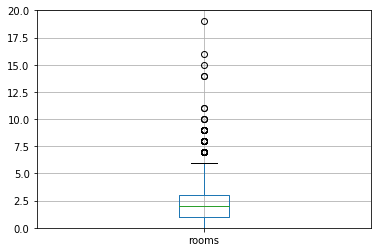

In [52]:
plt.ylim(0, 20)

data.boxplot(column=['rooms'])

In [53]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all
144,1,2450000,27.00,2017-03-30,0,2.70,24,15.50,2,False,...,NaN,NaN,181.0,90740.740741,30,3,2017,другой,0.574074,NaN
349,4,2320000,25.00,2017-09-27,0,2.75,14,17.00,1,False,...,NaN,NaN,45.0,92800.000000,27,9,2017,первый,0.680000,NaN
440,8,2480000,27.11,2018-03-12,0,2.70,17,24.75,4,False,...,2.0,982.0,64.0,91479.158982,12,3,2018,другой,0.912947,NaN
508,0,3375000,34.40,2017-03-28,0,2.64,26,24.30,19,False,...,1.0,593.0,430.0,98110.465116,28,3,2017,другой,0.706395,NaN
608,2,1850000,25.00,2019-02-20,0,2.63,10,18.00,7,False,...,NaN,NaN,29.0,74000.000000,20,2,2019,другой,0.720000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.70,25,18.00,16,False,...,1.0,623.0,14.0,123076.923077,1,9,2017,другой,0.692308,NaN
23442,0,2500000,27.70,2017-09-28,0,2.70,24,18.00,4,False,...,NaN,NaN,4.0,90252.707581,28,9,2017,другой,0.649819,NaN
23554,15,3350000,26.00,2018-09-07,0,2.70,19,18.00,8,False,...,2.0,112.0,31.0,128846.153846,7,9,2018,другой,0.692308,NaN
23592,10,1450000,29.00,2017-11-11,0,2.56,9,18.00,8,False,...,NaN,NaN,82.0,50000.000000,11,11,2017,другой,0.620690,NaN


In [54]:
data.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,0.0,NaN,NaN,95264.017420,1,7,2018,последний,0.755580,0.072401
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,2.0,435.0,418.0,68870.523416,23,12,2017,другой,0.611570,0.045730
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0.0,NaN,14.0,110169.491525,14,2,2019,другой,0.693220,0.169492
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,2.0,66.0,813.0,170015.455951,7,2,2017,другой,0.664606,0.061309
14498,6,32250000,374.6,2018-06-09,19,2.70,5,264.5,2,False,...,2.0,548.0,114.0,86091.831287,9,6,2018,другой,0.706086,0.073679
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,0.0,NaN,1365.0,105555.555556,2,3,2015,последний,0.666667,0.048148
20829,6,28659000,245.4,2016-03-31,14,2.70,4,168.3,2,False,...,2.0,118.0,95.0,116784.841076,31,3,2016,другой,0.685819,0.105542


Так же исходя из последующих просмотров графиков я нашел анамальное минимальное значение цены в Санкт-Петербурге, поэтому я удалю его

In [55]:
data = data.query('rooms <= 11')

In [56]:
data.query('locality_name == "Санкт-Петербург"').sort_values('cost_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all
17753,12,1800000,117.3,2016-02-18,5,2.7,4,23.6,2,False,...,0.0,NaN,139.0,15345.268542,18,2,2016,другой,0.201194,0.109974
19952,7,2200000,138.7,2016-06-24,4,2.7,7,90.7,5,False,...,2.0,653.0,203.0,15861.571738,24,6,2016,другой,0.653929,0.098774
21338,15,3200000,190.0,2016-06-16,1,3.0,6,43.0,4,False,...,0.0,NaN,11.0,16842.105263,16,6,2016,другой,0.226316,0.068421
23394,10,1600000,92.0,2018-07-10,3,3.0,6,13.0,1,False,...,3.0,167.0,3.0,17391.304348,10,7,2018,первый,0.141304,0.108696
4248,8,1200000,49.1,2018-10-21,4,2.5,5,36.9,1,False,...,0.0,NaN,44.0,24439.918534,21,10,2018,первый,0.751527,0.105906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17912,17,135000000,166.0,2019-02-07,3,3.3,7,52.0,1,False,...,3.0,215.0,NaN,813253.012048,7,2,2019,первый,0.313253,0.385542
16647,15,122000000,145.0,2017-04-25,3,3.3,6,36.0,2,False,...,3.0,250.0,335.0,841379.310345,25,4,2017,другой,0.248276,0.496552
17172,14,28000000,33.0,2019-04-30,1,3.5,5,17.6,2,False,...,3.0,27.0,NaN,848484.848485,30,4,2019,другой,0.533333,0.273939
4859,16,28000000,33.0,2019-04-29,1,3.5,5,17.6,2,False,...,3.0,119.0,NaN,848484.848485,29,4,2019,другой,0.533333,0.273939


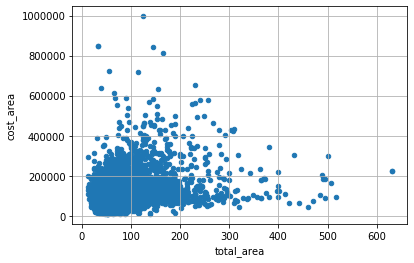

In [57]:
data.plot(x='total_area', y='cost_area', kind='scatter', grid=True);

In [58]:
import seaborn as sns

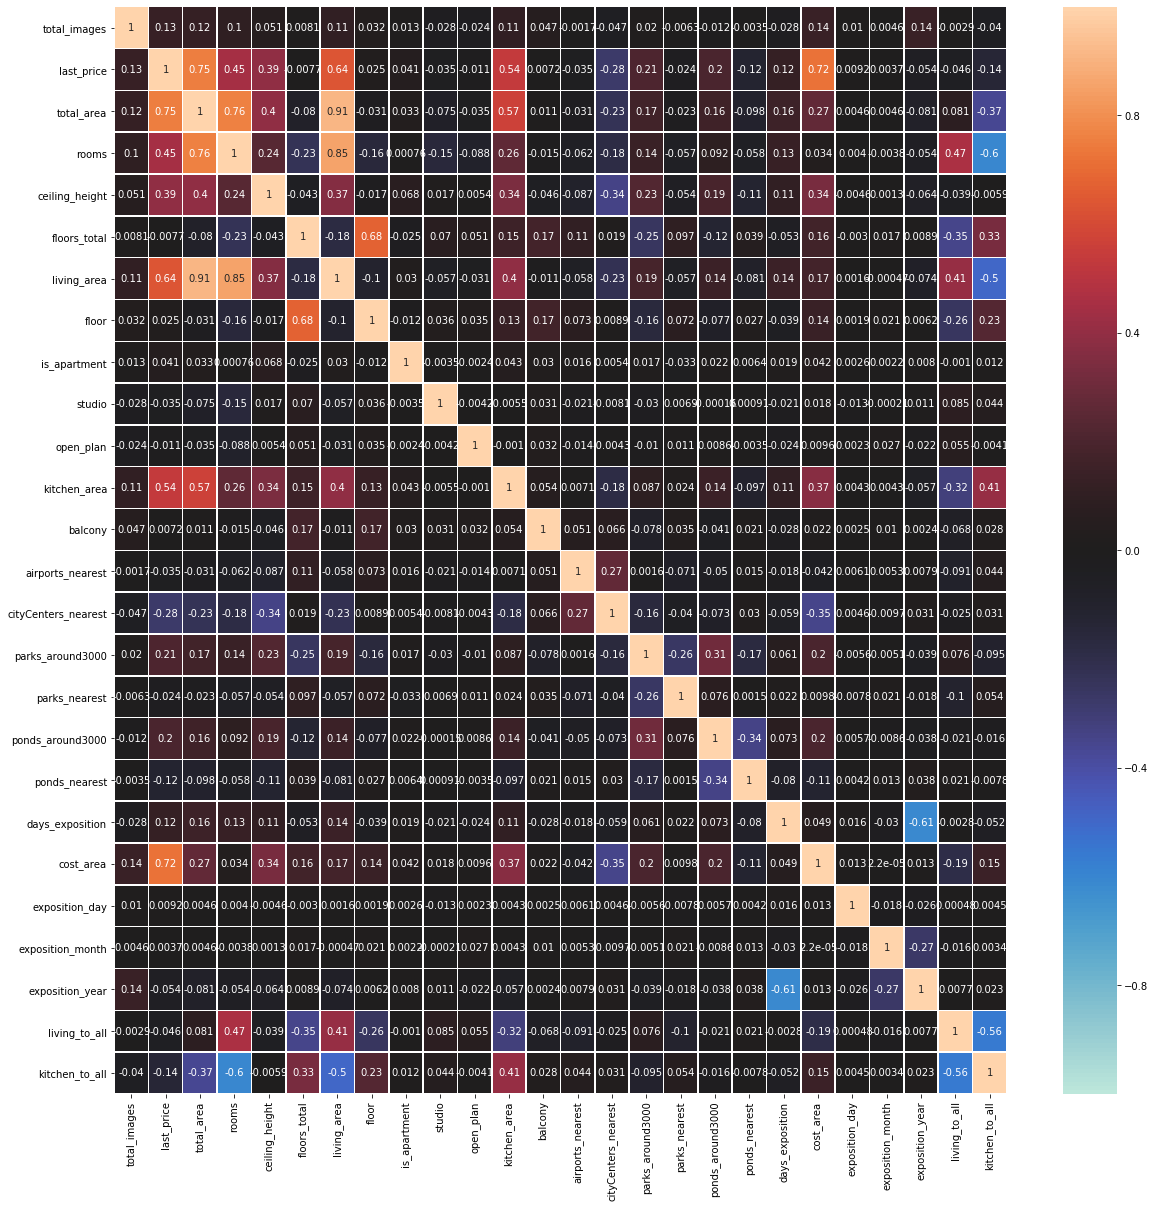

In [59]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax, center=0, vmin=-1, vmax=1);


In [60]:
data['cost_area'].corr(data['floors_total'])

0.16476658265656202

In [61]:
data['cost_area'].corr(data['floor'])

0.13834116283302683

Корреляция совсем не большая, поэтому посмотрим по графикам

Проверим как меняется цена в зависимости от этажа

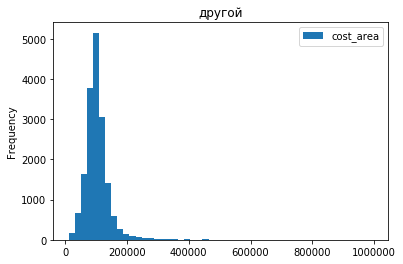

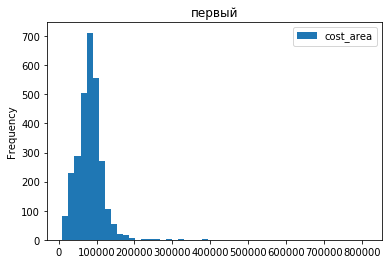

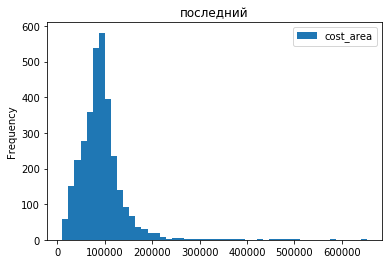

In [62]:
for name, group_data in data.groupby('apartment_floor'):
    group_data.plot(y='cost_area', title=name, kind='hist', bins=50)

In [63]:
for name, group_data in data.groupby('apartment_floor'):
    print('медианное значение по', name, group_data['cost_area'].median())

медианное значение по другой 98341.60056970263
медианное значение по первый 81558.1981403401
медианное значение по последний 88172.04301075269


Из гистограммы понятно, что медианная цена за квадратный метр больше всего у квартиры группы "другой". А самые медианные цены у первого этажа, что в целом как и в жизни. Мало кто хочет жить на первом этаже

Сейчас посмотрим как цена зависит от площади квартиры

In [64]:
data['cost_area'].corr(data['total_area'])

0.26963490287602326

Тут уже корреляция больше, но всё равно не такая существенная

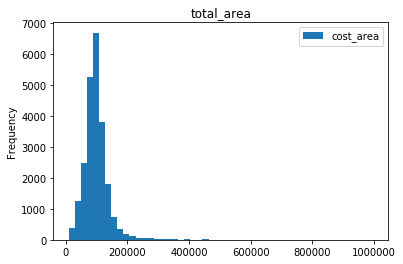

In [65]:
data.plot(y='cost_area', title='total_area', kind='hist', bins=50)

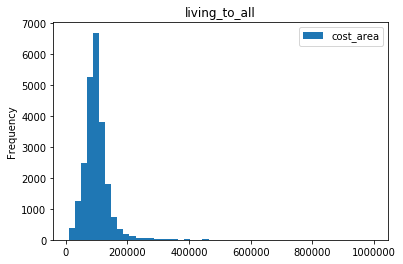

In [66]:
data.plot(y='cost_area', title='living_to_all', kind='hist', bins=50)

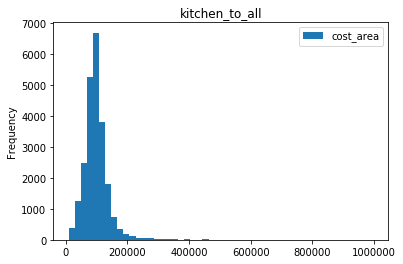

In [67]:
data.plot(y='cost_area', title='kitchen_to_all', kind='hist', bins=50)

Судя по гистограммам заметной разницы между площадью и ценой нет. Так же и нет зависимости от соотношения жилой площади к общей, и кухонной площади к общей.

Зависит ли цена от количества комнат

In [68]:
data['cost_area'].corr(data['rooms'])

0.033638597196158714

Очень маленькая корреляция

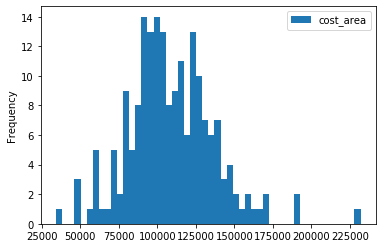

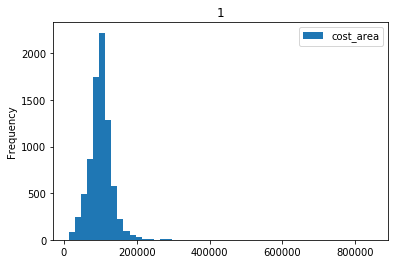

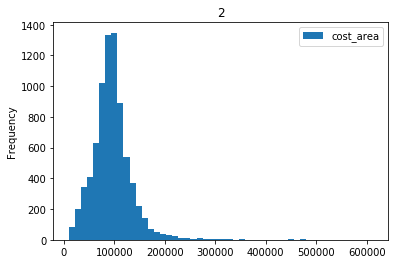

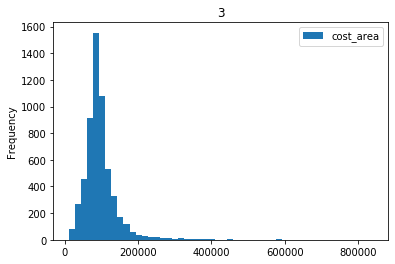

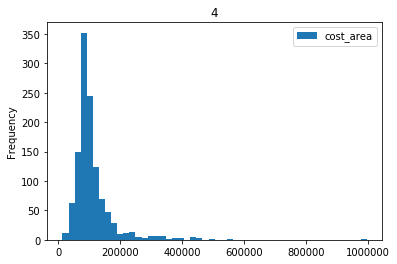

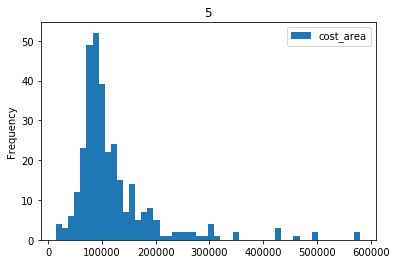

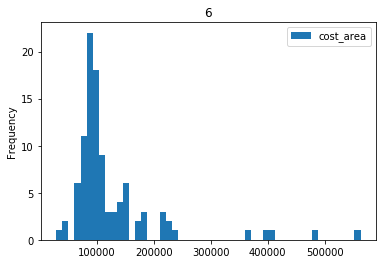

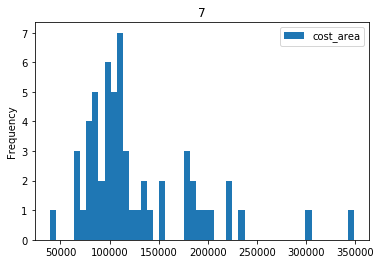

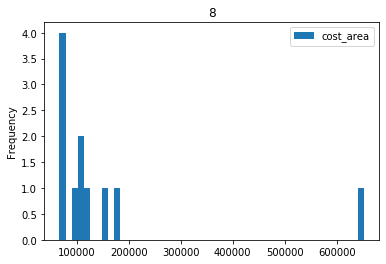

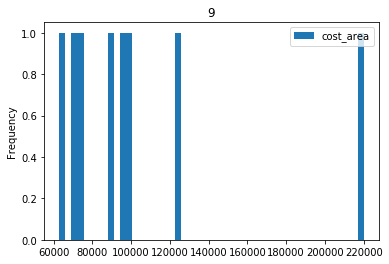

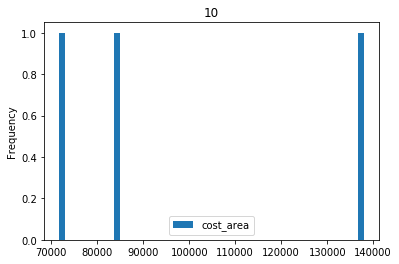

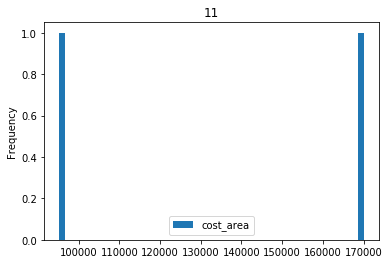

In [69]:
for name, group_data in data.groupby('rooms'):
    group_data.plot(y='cost_area', title=name, kind='hist', bins=50);

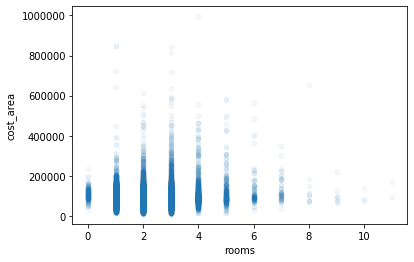

In [70]:
data.plot(x='rooms', y='cost_area', kind='scatter', alpha=0.05);

In [71]:
for name, group_data in data.groupby('rooms'):
    print('медианное значение по', name, group_data['cost_area'].median())

медианное значение по 0 105555.55555555556
медианное значение по 1 100000.0
медианное значение по 2 93023.25581395348
медианное значение по 3 89062.5
медианное значение по 4 92607.31319554849
медианное значение по 5 96384.25967526768
медианное значение по 6 99253.73134328358
медианное значение по 7 108536.58536585367
медианное значение по 8 106187.05035971223
медианное значение по 9 92517.80712284913
медианное значение по 10 84372.70726338957
медианное значение по 11 132639.7366851235


In [72]:
data.query('rooms == 0')['total_area'].describe()

count    191.000000
mean      29.384450
std       26.250543
min       15.500000
25%       24.075000
50%       26.100000
75%       28.450000
max      371.000000
Name: total_area, dtype: float64

Видимо пропустил про количество комнат, и решил посмотреть что из себя представляют квартиры с 0 комнатами. Видимо это какие-то отдельные помещения. Что же касается цены, то цены в целом не меняются, но по медианным значениям видно, что квартиры с 12 комнатами имеют самую большую цену за квадратный метр, однако мне кажется выборка не такая большая, поэтому не совсем может соответсвовать правде. А так большую медианную цену за квадратный метр имеют квартиры с 1 комнатой

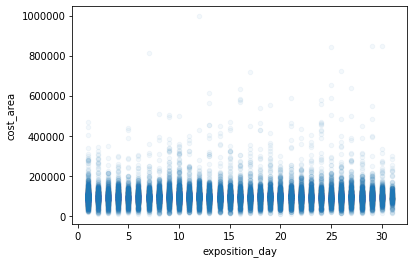

In [74]:
data.plot(x='exposition_day', y='cost_area', kind='scatter', alpha=0.05);

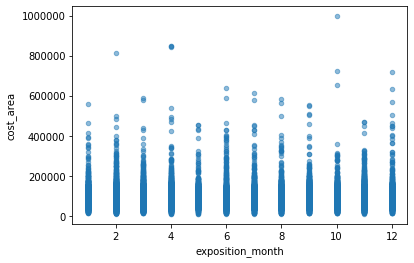

In [75]:
data.plot(x='exposition_month', y='cost_area', kind='scatter', alpha=0.5);

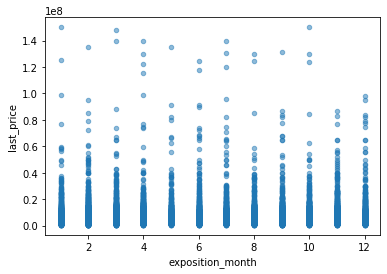

In [76]:
data.plot(x='exposition_month', y='last_price', kind='scatter', alpha=0.5);

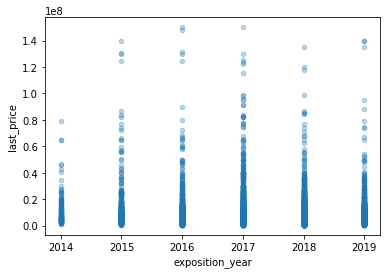

In [77]:
data.plot(x='exposition_year', y='last_price', kind='scatter', alpha=0.3);

Судя по гистограммам зависимостей от дней или месяцев нет, а вот по годам видно, что самая большая цена была в 2017 году, а в 2014 самая маленькая

Посмотрим как зависит цена от расстояния к центру города

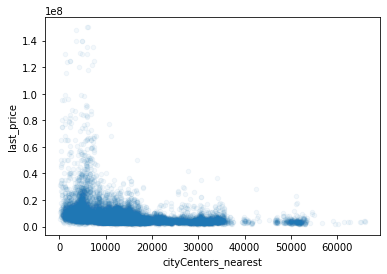

In [78]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.05);

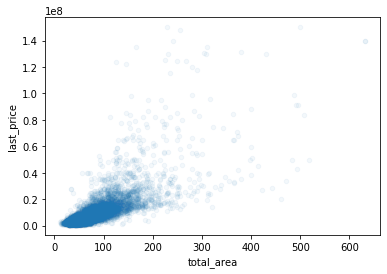

In [79]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05);

Очевидно видно, что чем ближе к центру населенного пункта, то там больше цена за квадратный метр

In [80]:
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.753568,0.447107,-0.275905
total_area,0.753568,1.000000,0.760190,-0.232585
rooms,0.447107,0.760190,1.000000,-0.182946
cityCenters_nearest,-0.275905,-0.232585,-0.182946,1.000000


Сделаем группу из 10 населенных пунктов с наибольшим количеством объявлений

In [81]:
data['locality_name'].value_counts()[:10]

Санкт-Петербург      15611
посёлок Мурино         518
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

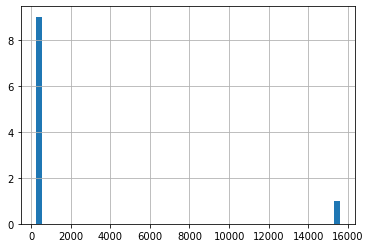

In [82]:
data['locality_name'].value_counts()[:10].hist(bins=50);

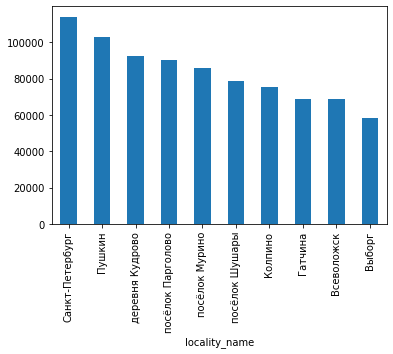

In [83]:

top10 = (data.groupby('locality_name')['cost_area'].agg(['count', 'mean']).nlargest(columns='count', n=10)).sort_values(by = 'mean', ascending=False)
top10['mean'].plot.bar()

In [84]:
top_city = pd.Series(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг'])

In [85]:
data_top_city = data.query('locality_name in @top_city')

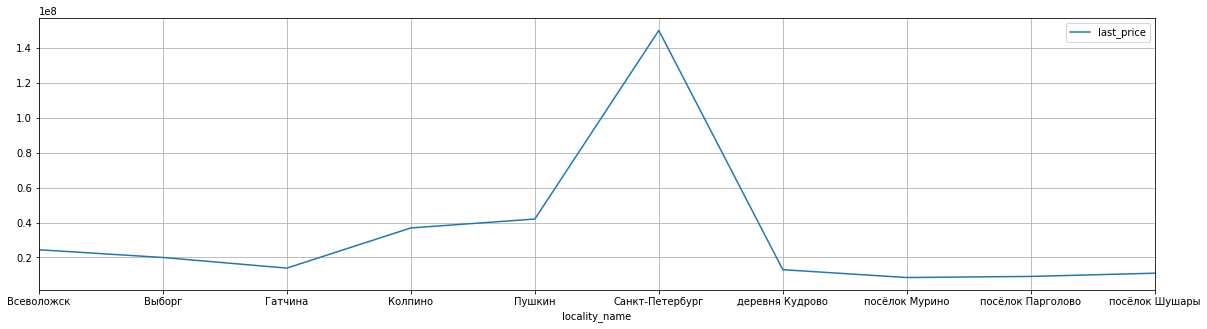

In [86]:
(
    data_top_city.pivot_table(index='locality_name', values='last_price', aggfunc='max')
    .plot(grid=True, figsize=(20, 5))
);

Судя по графику у нас самые дорогие квартиры в Санкт-Петербруге

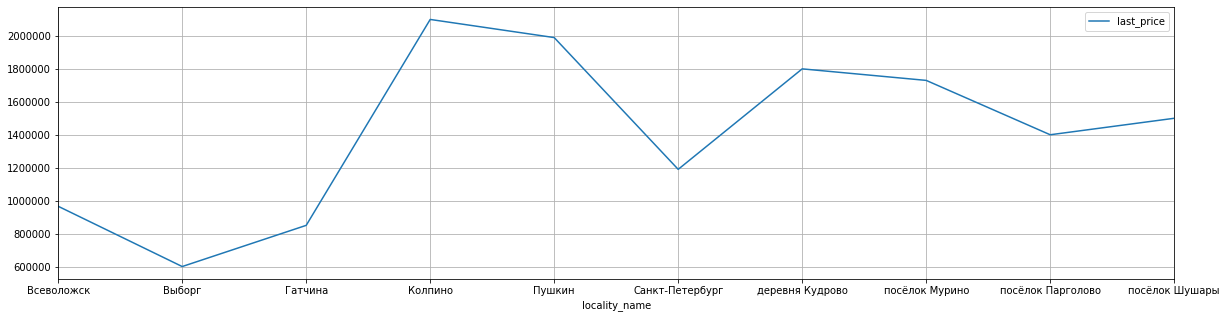

In [87]:
(
    data_top_city.pivot_table(index='locality_name', values='last_price', aggfunc='min')
    .plot(grid=True, figsize=(20, 5))
);

И тут получается что самая низкая цена в Выборге, но я так бы построил графики по цене за квадратный метр

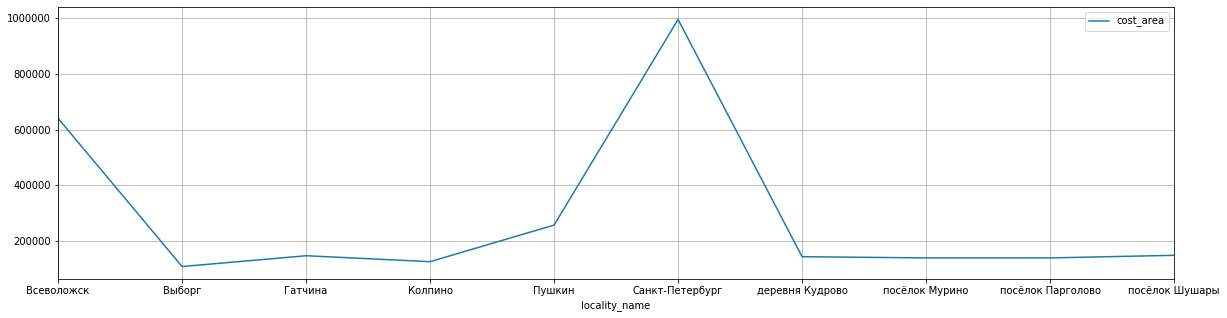

In [88]:
(
    data_top_city.pivot_table(index='locality_name', values='cost_area', aggfunc='max')
    .plot(grid=True, figsize=(20, 5))
);

И тут по цене за квадратный метр на второе место вырывается Всеволожск, что странно, ну да ладно. Возможно это так же выбросы

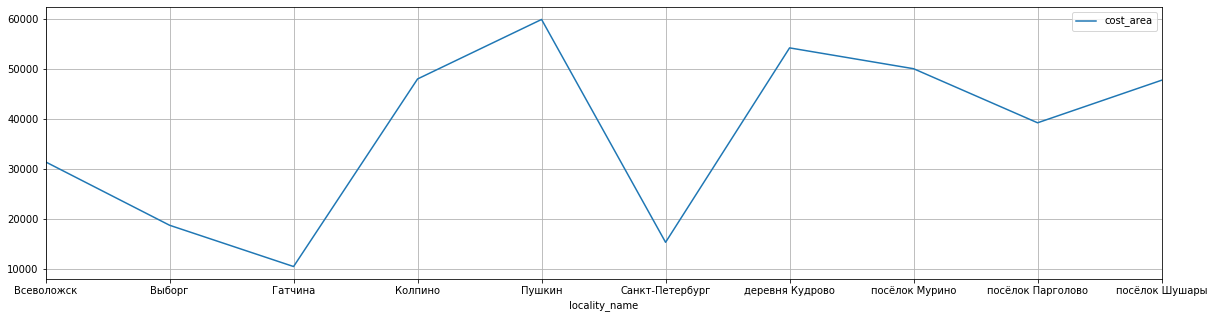

In [89]:
(
    data_top_city.pivot_table(index='locality_name', values='cost_area', aggfunc='min')
    .plot(grid=True, figsize=(20, 5))
);

А вот минимальная цена за квадратный метр становится в Гатчине

In [90]:
data_spb = data.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)
data_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15611 entries, 0 to 15610
Data columns (total 29 columns):
total_images            15611 non-null int64
last_price              15611 non-null int64
total_area              15611 non-null float64
first_day_exposition    15611 non-null datetime64[ns]
rooms                   15611 non-null int64
ceiling_height          15611 non-null float64
floors_total            15611 non-null int64
living_area             15611 non-null float64
floor                   15611 non-null int64
is_apartment            15611 non-null bool
studio                  15611 non-null bool
open_plan               15611 non-null bool
kitchen_area            15502 non-null float64
balcony                 15611 non-null int64
locality_name           15611 non-null object
airports_nearest        15527 non-null float64
cityCenters_nearest     15551 non-null float64
parks_around3000        15551 non-null float64
parks_nearest           7228 non-null float64
ponds_around30

In [91]:
data_spb['cityCenters_nearest'].isnull().sum()

60

In [92]:
data_spb = data.dropna(axis='index', how='any', subset=['cityCenters_nearest'])
data_spb['centers_nearest'] = data_spb['cityCenters_nearest'].apply(lambda x: x / 1000).astype('int')
data_spb.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,cost_area,exposition_day,exposition_month,exposition_year,apartment_floor,living_to_all,kitchen_to_all,centers_nearest
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755.0,NaN,120370.370370,7,3,2019,другой,0.472222,0.231481,16
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,NaN,81.0,82920.792079,4,12,2018,первый,0.460396,0.272277,18
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,574.0,558.0,92785.714286,20,8,2015,другой,0.612500,0.148214,13
3,0,64900000,159.0,2015-07-24,3,2.70,14,45.0,9,False,...,234.0,424.0,408176.100629,24,7,2015,другой,0.283019,0.059748,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.000000,19,6,2018,другой,0.320000,0.410000,8


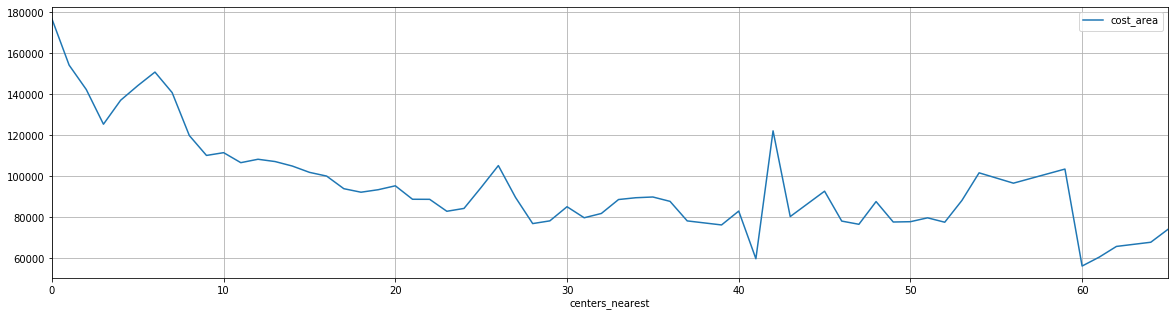

In [93]:
(
    data_spb.pivot_table(index='centers_nearest', values='cost_area', aggfunc='mean')
    .plot(grid=True, figsize=(20, 5))
);

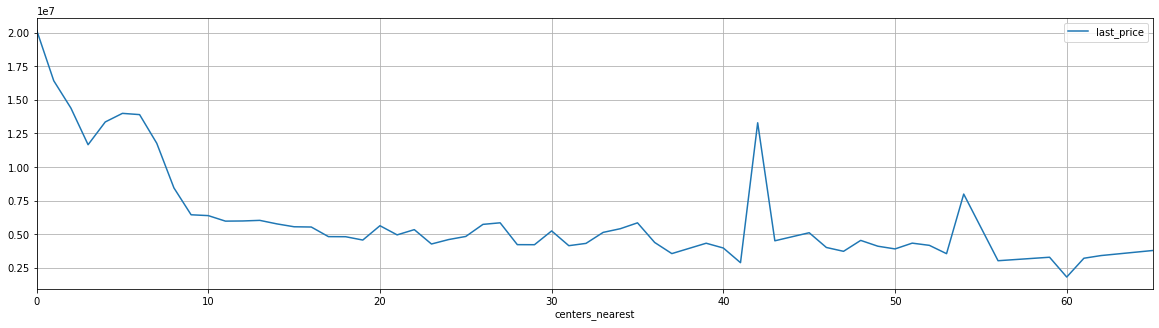

In [94]:
(
    data_spb.pivot_table(index='centers_nearest', values='last_price', aggfunc='mean')
    .plot(grid=True, figsize=(20, 5))
);

Исходя из графиков я предположу, что граница центра города находится в 6 км, судя по цене за квадратный метр.

In [95]:
data_spb_centr = data_spb.query('centers_nearest <= 6').reset_index(drop=True)
data_spb_centr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3284 entries, 0 to 3283
Data columns (total 30 columns):
total_images            3284 non-null int64
last_price              3284 non-null int64
total_area              3284 non-null float64
first_day_exposition    3284 non-null datetime64[ns]
rooms                   3284 non-null int64
ceiling_height          3284 non-null float64
floors_total            3284 non-null int64
living_area             3284 non-null float64
floor                   3284 non-null int64
is_apartment            3284 non-null bool
studio                  3284 non-null bool
open_plan               3284 non-null bool
kitchen_area            3269 non-null float64
balcony                 3284 non-null int64
locality_name           3277 non-null object
airports_nearest        3278 non-null float64
cityCenters_nearest     3284 non-null float64
parks_around3000        3284 non-null float64
parks_nearest           2191 non-null float64
ponds_around3000        3284 non-n

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90a0368050>]],
      dtype=object)

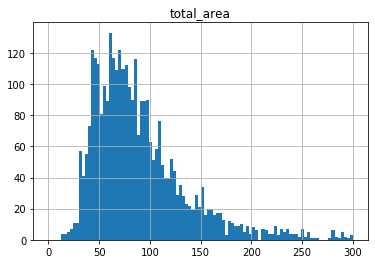

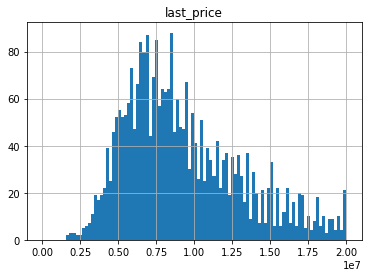

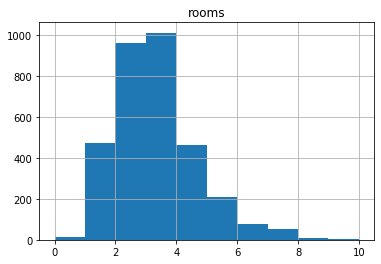

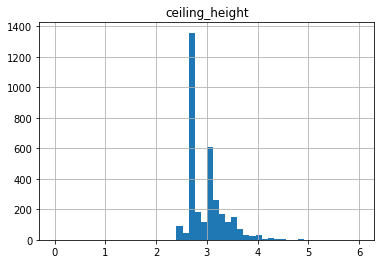

In [96]:
data_spb_centr.hist(column='total_area', bins=100, range=(0, 300))

data_spb_centr.hist(column='last_price', bins=100, range=(0, 2*10e+6))

data_spb_centr.hist(column='rooms', bins=10, range=(0, 10))

data_spb_centr.hist(column='ceiling_height', bins=50, range=(0, 6))


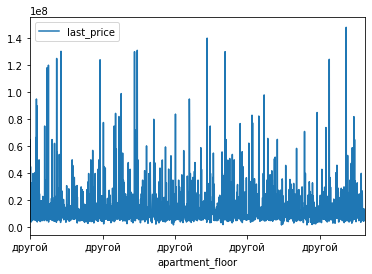

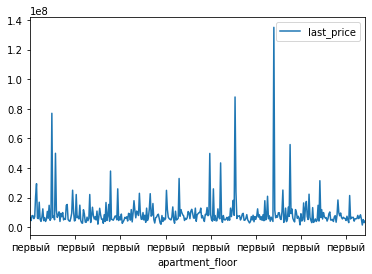

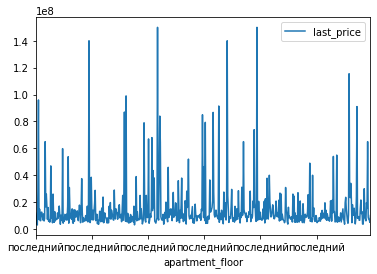

In [97]:
data_spb_centr.groupby('apartment_floor').plot(x='apartment_floor', y='last_price');

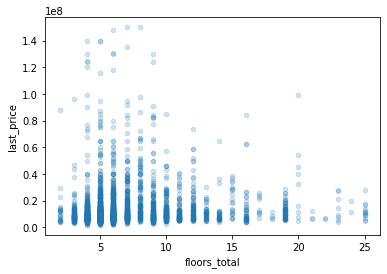

In [98]:
data_spb_centr.plot(x='floors_total', y='last_price', kind='scatter', alpha=0.2);

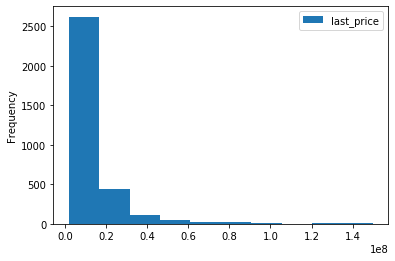

In [99]:
data_spb_centr.plot(x='floors_total', y='last_price', kind='hist');

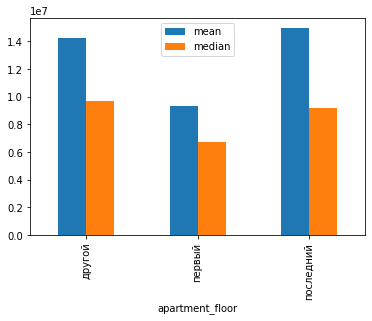

In [100]:
сentr_top = data_spb_centr.groupby('apartment_floor')['last_price'].agg(['mean', 'median'])

сentr_top.plot.bar()

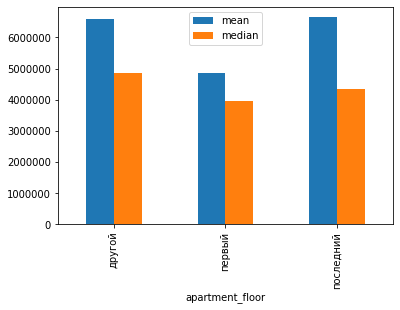

In [101]:
appart_stat = data.groupby('apartment_floor')['last_price'].agg(['mean', 'median'])

appart_stat.plot.bar()

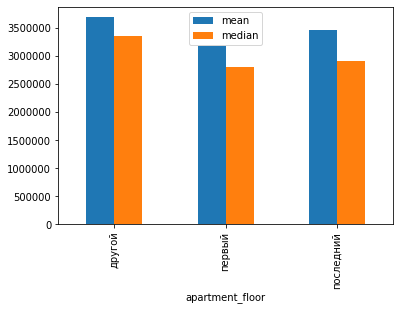

In [102]:
appart_stat_nospb = data.query('locality_name != "Санкт-Петербург"').groupby('apartment_floor')['last_price'].agg(['mean', 'median'])

appart_stat_nospb.plot.bar()

In [103]:
data_spb_centr[['last_price', 'total_area', 'rooms', 'ceiling_height']].corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.718519,0.393154,0.193717
total_area,0.718519,1.000000,0.729375,0.269808
rooms,0.393154,0.729375,1.000000,0.234074
ceiling_height,0.193717,0.269808,0.234074,1.000000


In [104]:
data[['last_price', 'total_area', 'rooms', 'ceiling_height']].corr()

,last_price,total_area,rooms,ceiling_height
last_price,1.000000,0.753568,0.447107,0.390628
total_area,0.753568,1.000000,0.760190,0.398371
rooms,0.447107,0.760190,1.000000,0.236419
ceiling_height,0.390628,0.398371,0.236419,1.000000


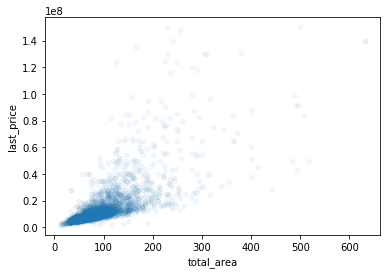

In [105]:
data_spb_centr.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05);

In [106]:
for name, group_data in data_spb_centr.groupby('apartment_floor'):
    print('медианное значение по', name, group_data['last_price'].mean())

медианное значение по другой 14220274.41987041
медианное значение по первый 9339522.024193548
медианное значение по последний 14961798.695142379


Данные немного различаются по отношению к другим населенным пунктам, как минимум в большей средней цене за недвижимость. Но в целом данные похожие.
Особой зависимости по дням и месяцам я не вижу, однако по годам данные повторяются, даже больше всего объявлений появляется в 2017 году.

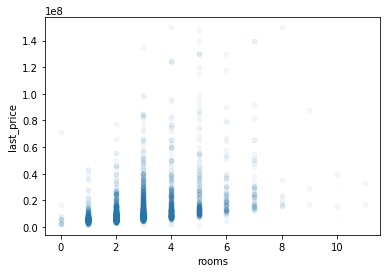

In [107]:
data_spb_centr.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05);

Что касается количества комнат, то продают квартиры все, но больший размах в ценах у людей с 3-х комнатами в квартирах. но и цена становится больше ближе к центру, нежели в отношении других

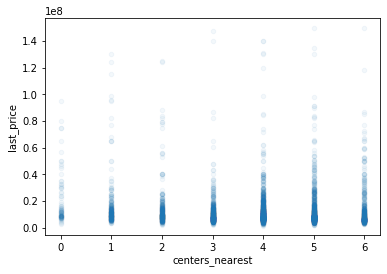

In [108]:
data_spb_centr.plot(x='centers_nearest', y='last_price', kind='scatter', alpha=0.05)

А тут становится понятно, что люди меньше всего продают квартиры совсем близко к центру, и больше выставленных объявлений от 3км от центра.

## Общий вывод

Подводя к общему выводу самые очевидное было в том, что в 2014 году было меньше всего объявлений, что в Санкт-Петербуре, что в других населенных пунктах. По дням и месяцам выкладывания объявления разницы замечено не было. Так же присутствуют большие скачки в квартирах с 2-6 комнатами. А вот как отследить аномалии я так и не понял. Возможно 